# Perceptron Learning Algorithm
This Jupyter Notebook demonstrates the implementation of the Perceptron Learning Algorithm for classifying linearly separable data in 2D. The notebook includes the generation of synthetic data, the implementation of the perceptron learning algorithm, and an analysis of the algorithm's performance with varying levels of data separability.

## Importing Necessary Modules
The following modules are required for data generation, algorithm implementation, and visualization:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Linearly Separable Data
Data is generated based on the linear equation ax + by + c = 0. Each point is labeled based on whether ax + by + c is greater than 0.

ax + by + c = 0

and labelling them according weather ax + by + c > 0 or not

In [2]:
# Generate linearly separable data
def generate_linearly_separable_data(num_points, a, b, c):
    X = np.random.rand(num_points, 2)
    Y = (a * X[:, 0] + b * X[:, 1] + c > 0).astype(int)
    return X, Y

## Plotting Function
This function visualizes the linearly separable data along with the decision boundary. The decision boundary is calculated using the formula y = -(a/b) * x - c/b.

In [3]:
# Plot data with decision boundary
def plot_data_with_decision_boundary(X, Y, a, b, c):
    plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0', alpha=0.7, marker='x')
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1', alpha=0.7, marker='x')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Linearly Separable Data with Decision Boundary')
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = -(a/b) * x_vals - c/b
    plt.plot(x_vals, y_vals, '--', color='green', label='Decision Boundary')
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

## Perceptron Learning Algorithm Implementation
The perceptron learning algorithm is implemented with a default maximum of 1000 epochs. It returns the learned weights and the number of iterations needed to learn them.

In [4]:
# Perceptron learning algorithm
def perceptron_learning_algorithm(X, Y, max_epoch=1000):
    W = np.random.rand(3)  # Store initial weights    
    total_updates = 0
    for epoch in range(max_epoch):
        k = 0           
        for i in range(len(X)):
            if Y[i] == 1 and np.dot(W, X[i]) < 0:
                W = W + X[i]
                k += 1
            elif Y[i] == 0 and np.dot(W, X[i]) >= 0:
                W = W - X[i]
                k += 1
        if k == 0:            
            break 
        total_updates += k
    return W, k

## Data Generation and Visualization
Generate the synthetic data and visualize it with the decision boundary.

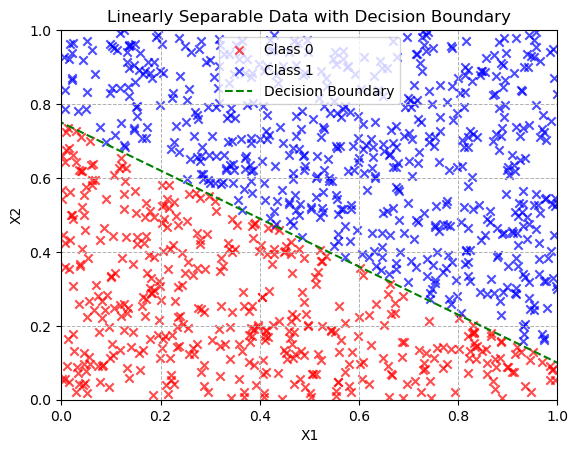

In [5]:
# Data generation and visualization
num_points = 1000
a, b, c = 2.6, 4, -3
X, Y = generate_linearly_separable_data(num_points, a, b, c)
plot_data_with_decision_boundary(X, Y, a, b, c)

## Running the Perceptron Algorithm
The perceptron algorithm is applied to the linearly separable data.

In [6]:
# Running the perceptron algorithm
ones = np.ones((X.shape[0], 1))
X_with_ones = np.concatenate((ones, X), axis=1)
W, k = perceptron_learning_algorithm(X_with_ones, Y, 1000)


## Weight Visualization
Print the weights learned by the perceptron algorithm.

In [7]:
print("Learned weights:", W)

Learned weights: [-11.17975158   9.6773099   14.8951677 ]


## Plotting the Decision Boundary After Training
Visualize the decision boundary learned by the perceptron on the dataset.

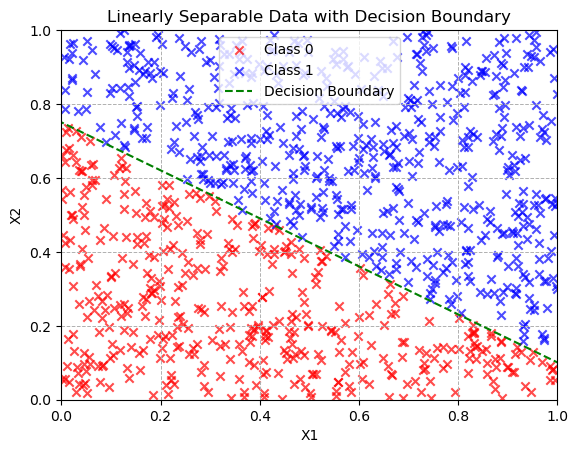

In [8]:
# Plot the decision boundary after training
plot_data_with_decision_boundary(X, Y, W[1], W[2], W[0])

## Generating Data with Varying Separability (Gamma)
Data with different levels of separability is generated using PyTorch. The separability is controlled using the gamma parameter. Covariance matrices are set to identity to ensure features vary independently.

In [9]:
# Generate data with varying separability
def generate_data(num_points_per_class, gamma_values):
    data_list = []
    labels_list = []
    np.random.seed(None)
    for gamma in gamma_values:
        # Means for each class
        mean_class1 = np.array([gamma, gamma])
        mean_class2 = np.array([-gamma, -gamma])

        # Covariance matrices for each class (identity matrices in this case)
        cov_matrix = np.eye(2)
        data_class1 = np.random.multivariate_normal(mean_class1, cov_matrix, num_points_per_class)
        data_class2 = np.random.multivariate_normal(mean_class2, cov_matrix, num_points_per_class)
        
        # Combine data from both classes        
        data = np.vstack((data_class1, data_class2))
        labels = np.hstack((np.zeros(num_points_per_class), np.ones(num_points_per_class)))
        data_list.append(data)
        labels_list.append(labels)
        
    return data_list, labels_list

## Plotting Data for Different Gamma Values
Visualize the data for different levels of separability.

In [10]:
def plot_data_with_gamma_and_initial_decision_boundary(data_list, labels_list, gamma_values):
    num_rows = 2
    num_cols = (len(gamma_values) + 1) // num_rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, (data, labels, gamma) in enumerate(zip(data_list, labels_list, gamma_values)):
        ax = axes[i]
        data_class1 = data[labels == 0]
        data_class2 = data[labels == 1]

        ax.scatter(data_class1[:, 0], data_class1[:, 1], color='red', label='Class 0', alpha=0.5)
        ax.scatter(data_class2[:, 0], data_class2[:, 1], color='blue', label='Class 1', alpha=0.5)

        # Calculate and plot initial decision boundary
        x_vals = np.linspace(-4, 4, 100)
        y_vals = np.zeros(100,) 
        ax.plot(x_vals, y_vals, '--', color='green', label=f'Initial Decision Boundary (γ = {gamma})')

        ax.set_title(f'Dataset with γ = {gamma}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.grid(True, linestyle='--', linewidth=0.7)
        ax.legend()

    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [11]:
# Running experiments for different gamma values
num_points_per_class = 500
gamma_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
data_list, labels_list = generate_data(num_points_per_class, gamma_values)

## Running Experiments for Different Gamma Values
The perceptron learning algorithm is run for different values of gamma. The average number of iterations (k) and the final weight vector (W) are recorded for analysis.

In [12]:
# Running experiments for different gamma values
avg_runs_per_gamma = 5
avg_k_per_gamma = []
avg_W_per_gamma = []


for data, labels, gamma in zip(data_list, labels_list, gamma_values):
    k_list_per_gamma = []
    W_list_per_gamma = []
    for run in range(avg_runs_per_gamma):
        ones = np.ones((data.shape[0], 1))
        X_with_ones = np.concatenate((ones, data), axis=1)
        W, k = perceptron_learning_algorithm(X_with_ones, labels, 5)
        W_list_per_gamma.append(W)
        k_list_per_gamma.append(k)

    avg_W = np.mean(np.array(W_list_per_gamma), axis=0)
    avg_k = np.mean(k_list_per_gamma)
    avg_W_per_gamma.append(avg_W)
    avg_k_per_gamma.append(avg_k)


## Plotting Data for Different Gamma Values with Random Decision boundary
Visualize the data for different levels of separability.

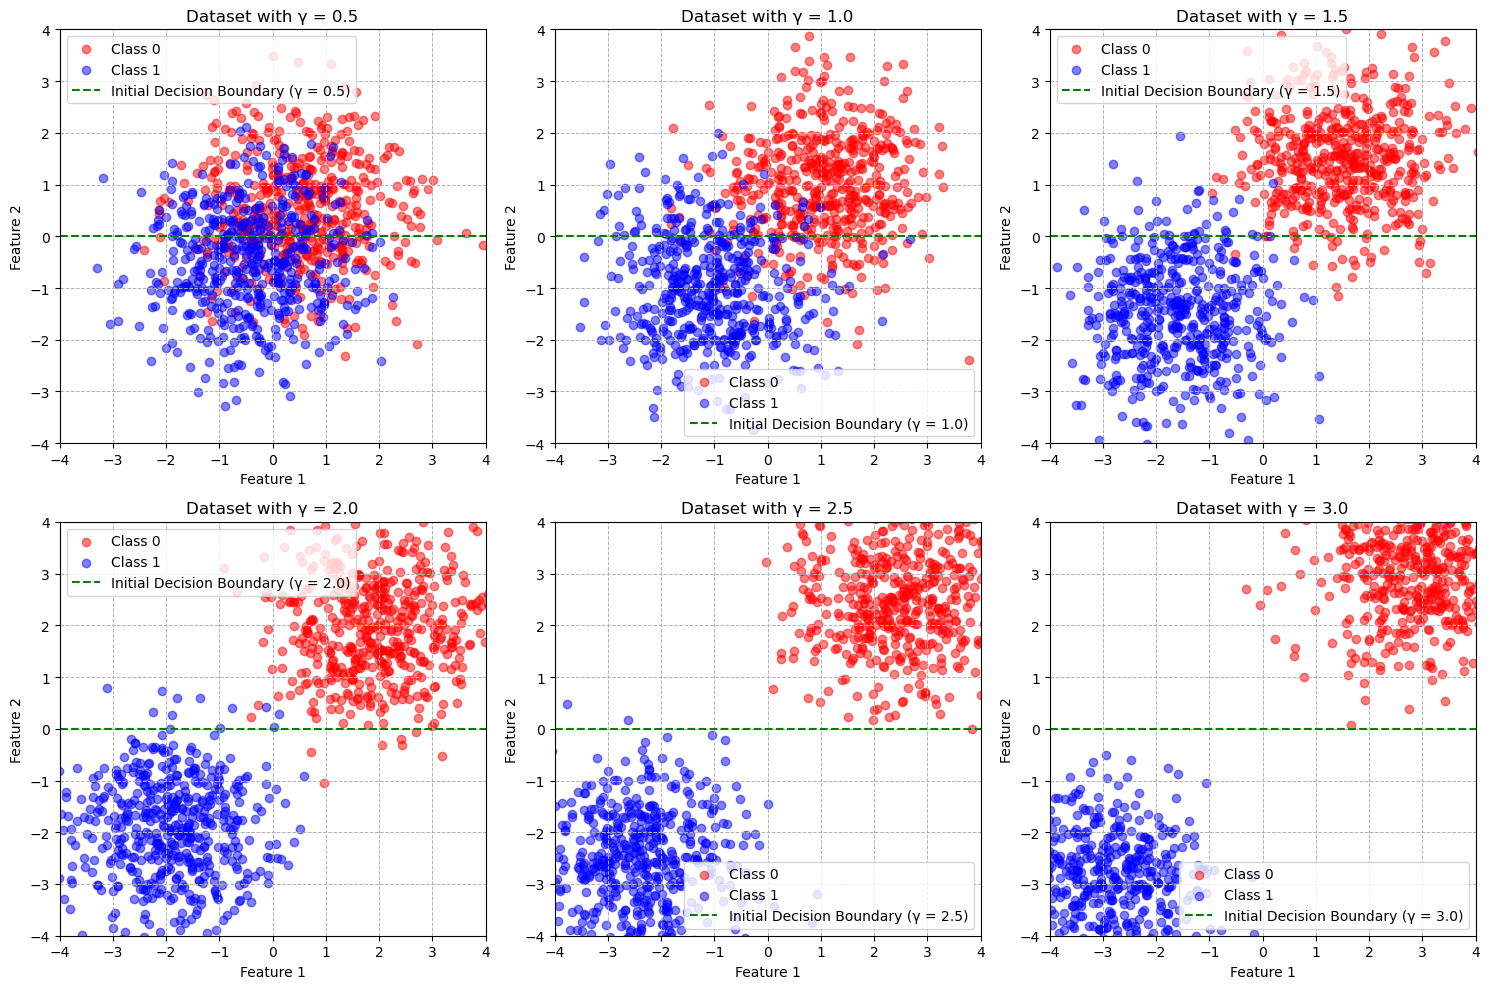

In [13]:
plot_data_with_gamma_and_initial_decision_boundary(data_list, labels_list, gamma_values)

## Visualizing the Trained Decision Boundary for Each Dataset
Plot the decision boundary for each dataset corresponding to different gamma values.

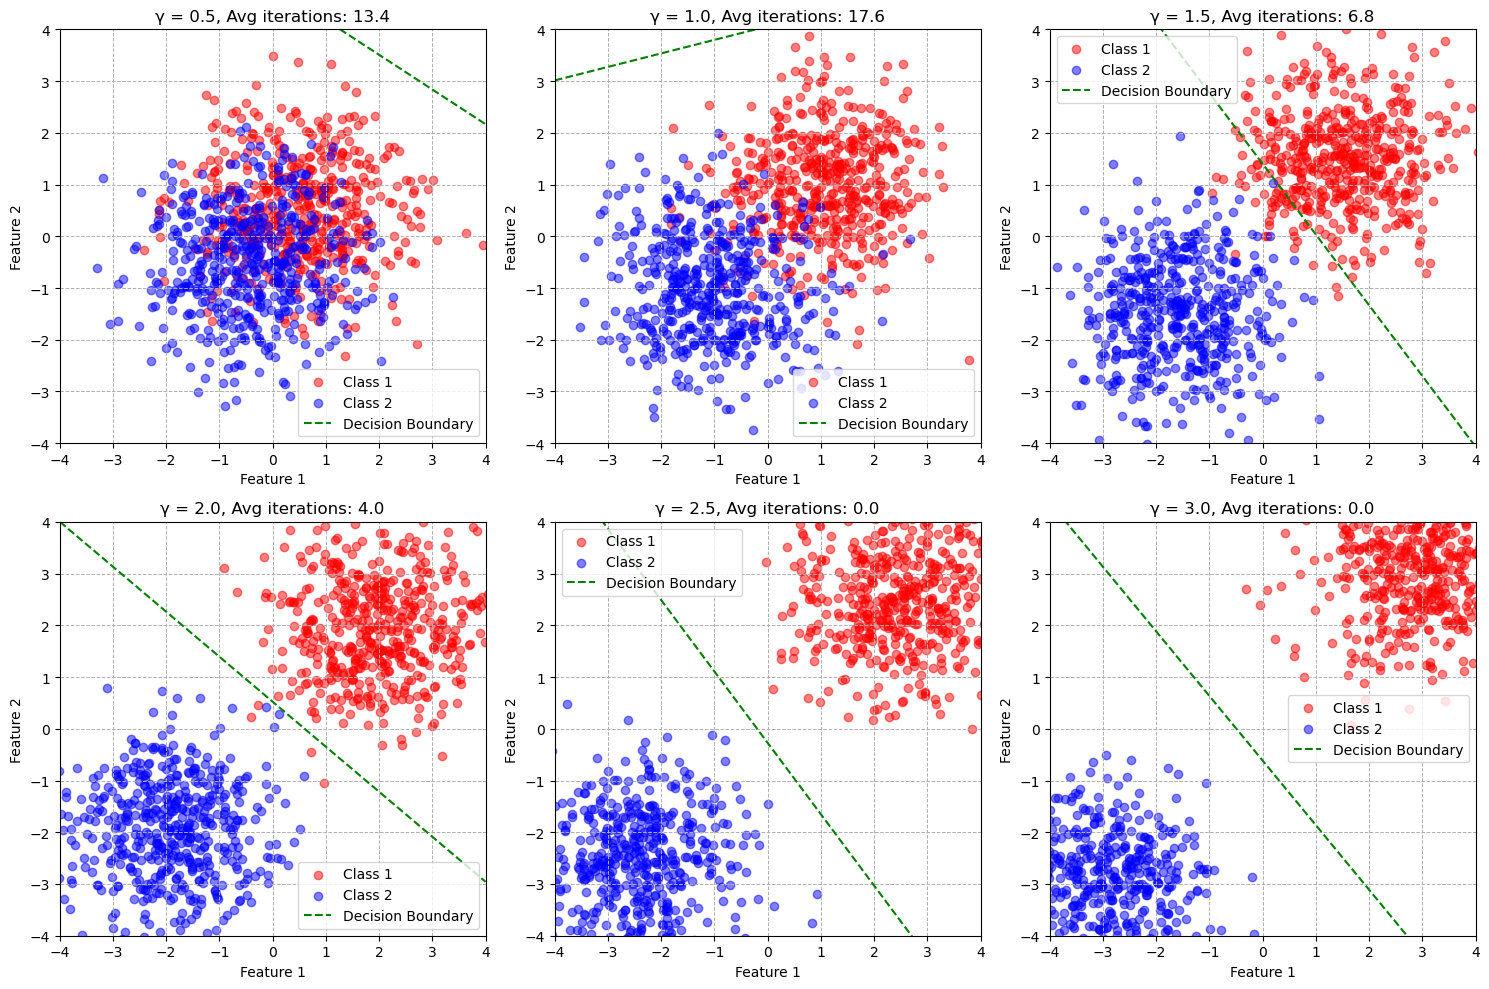

In [14]:
# Plotting decision boundaries for each dataset
num_rows = 2
num_cols = (len(gamma_values) + 1) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
for i, (W, k, gamma, data, labels) in enumerate(zip(avg_W_per_gamma, avg_k_per_gamma, gamma_values, data_list, labels_list)):
    ax = axes[i]
    data_class1 = data[labels == 0]
    data_class2 = data[labels == 1]
    ax.scatter(data_class1[:, 0], data_class1[:, 1], color='red', label='Class 1', alpha=0.5)
    ax.scatter(data_class2[:, 0], data_class2[:, 1], color='blue', label='Class 2', alpha=0.5)
    x_vals = np.linspace(-4, 4, 100)
    y_vals = -(W[1]/W[2]) * x_vals - (W[0]/W[2])
    ax.plot(x_vals, y_vals, '--', color='green', label=f'Decision Boundary')
    ax.set_title(f'γ = {gamma}, Avg iterations: {k}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid(True, linestyle='--', linewidth=0.7)
    ax.legend()
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Plotting No. of Iterations (k) vs. Gamma
A simple plot visualizes the relationship between the average number of iterations (k) required for the perceptron to converge and the level of separability (gamma).

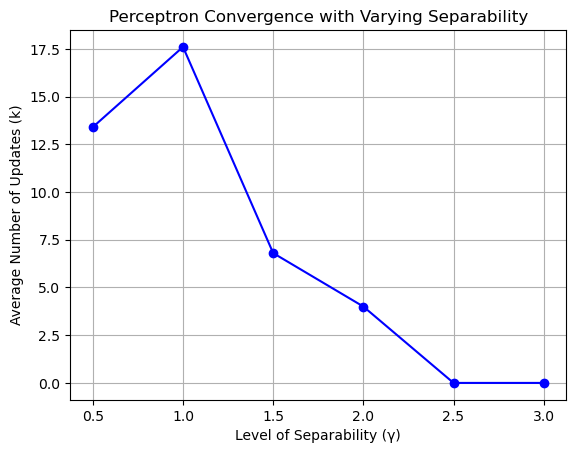

In [15]:
# Plotting No. of Iterations (k) vs. Gamma
plt.plot(gamma_values, avg_k_per_gamma, '-o', color='blue')
plt.xlabel('Level of Separability (γ)')
plt.ylabel('Average Number of Updates (k)')
plt.title('Perceptron Convergence with Varying Separability')
plt.grid(True)
plt.show()

## Discussion of Results
The plot clearly shows that as the level of separability (gamma) increases, the average number of iterations required for the perceptron to converge decreases. This observation aligns with the theoretical understanding that a higher separability makes it easier for the perceptron learning algorithm to find a solution, hence requiring fewer iterations.

# Gradient Descent Algorithm for Binary Classification

This section of the notebook demonstrates the implementation of the Gradient Descent algorithm for binary classification. The aim is to classify synthetic data into two classes using a Gradient Descent . The process involves generating synthetic data, implementing the sigmoid activation function and cross-entropy loss, and training the model using gradient descent.

## Generate and Plot Synthetic Data

In this part, synthetic data for a binary classification problem is generated. The data consists of two classes with different means and the same covariance matrix. A function is defined to plot the generated data, showing the initial distribution of the two classes.

In [16]:
# Generate synthetic data for a binary classification problem
def generate_data(num_points_per_class):
    # Define means for two classes
    mean_class1 = np.array([2.0, 2.0])
    mean_class2 = np.array([-2.0, -2.0])
    # Use identity matrix for covariance (independent features)
    cov_matrix = np.eye(2)
    # Sample data for each class
    data_class1 = np.random.multivariate_normal(mean_class1, cov_matrix, num_points_per_class)
    data_class2 = np.random.multivariate_normal(mean_class2, cov_matrix, num_points_per_class)
    # Stack data and labels
    data = np.vstack((data_class1, data_class2))
    labels = np.hstack((np.zeros(num_points_per_class), np.ones(num_points_per_class)))
    return data, labels

In [17]:
# Plotting function for data
def plot_data(data, labels):
    # Separate data by class
    data_class1 = data[labels == 0]
    data_class2 = data[labels == 1]
    # Plot data points
    plt.scatter(data_class1[:, 0], data_class1[:, 1], color='red', label='Class 0', alpha=0.5)
    plt.scatter(data_class2[:, 0], data_class2[:, 1], color='blue', label='Class 1', alpha=0.5)

    # Calculate and plot initial decision boundary
    x_vals = np.linspace(-6, 6, 100)
    y_vals = np.zeros(100,) 
    plt.plot(x_vals, y_vals, '--', color='green', label=f'Initial Decision Boundary')

    # Set plot details
    plt.title('Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.show()

## Visualizing the Random Decision Boundary Using Gradient Descent
Plot the decision boundary for dataset.

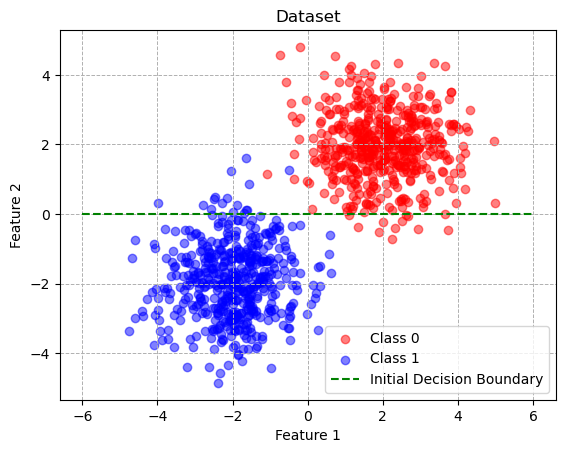

In [18]:
# Number of points per class
num_points_per_class = 500
# Generate and plot data
data, labels = generate_data(num_points_per_class)
plot_data(data, labels)


## Sigmoid Activation Function

The sigmoid function is implemented as the activation function for perceptron. 

In [19]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-Entropy Loss Function

The cross-entropy loss function is implemented to measure the performance of the percetron model.

In [20]:
# Cross entropy loss function
def cross_entropy_loss(y_pred, y_true):
    # Compute the cross-entropy loss
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / y_true.size


## Gradient Descent Perceptron

This section implements the gradient descent algorithm to optimize the weights of the perceptron model. The function iteratively adjusts the weights to minimize the cross-entropy loss.

In [21]:
# Gradient descent algorithm for logistic regression
def gradient_descent(X, y, eta, epochs):
    # Initialize weights randomly
    W = np.random.randn(X.shape[1] + 1)
    # Add bias term to input features
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))

    # Iterative optimization
    for epoch in range(epochs):
        # Compute model predictions
        logits = X_with_bias @ W
        y_pred = sigmoid(logits)
        # Compute the gradient of loss
        grad_loss = y_pred - y
        del_W = X_with_bias.T @ grad_loss / X.shape[0]
        # Update weights
        W = W - eta * del_W

    return W

In [22]:
# Train model using gradient descent
W = gradient_descent(data, labels, eta=0.01, epochs=10000)
print("Learned weights:", W)


Learned weights: [ 0.36768211 -2.00025226 -2.24757101]


## Visualizing the Trained Decision Boundary Using Gradient Descent
Plot the decision boundary for dataset.

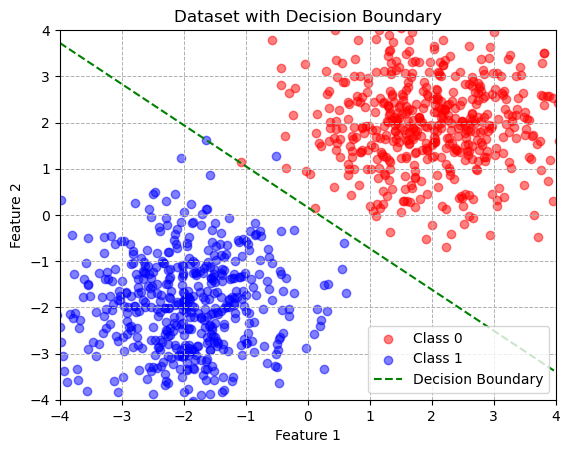

In [23]:
# Plot decision boundary
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], color='red', label='Class 0', alpha=0.5)
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color='blue', label='Class 1', alpha=0.5)
# Generate values for decision boundary line
x_vals = np.linspace(-4, 4, 100)
y_vals = -(W[1] / W[2]) * x_vals - (W[0] / W[2])
# Plot decision boundary
plt.plot(x_vals, y_vals, '--', color='green', label='Decision Boundary')
plt.title('Dataset with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend()
plt.show()


# Multi-Layer Perceptron (MLP) Implementation

This part of the notebook focuses on implementing a Multi-Layer Perceptron (MLP) for classification. The MLP is trained to classify a non-linearly separable dataset.

## Generate Moons Data

This section generates synthetic 'moons' data, which is not linearly separable, to test the MLP model.

In [24]:
np.random.seed(33)
# Corrected function to generate moon data
def generate_moons_data(n_samples=300, noise=0.1):
    n_samples_per_moon = n_samples // 2

    # Generate circle
    theta = np.linspace(0, np.pi, n_samples_per_moon)
    x1 = np.cos(theta) + noise * np.random.randn(n_samples_per_moon)
    y1 = np.sin(theta) + noise * np.random.randn(n_samples_per_moon)

    # Generate circle shifted and flipped
    x2 = 1 - np.cos(theta) + noise * np.random.randn(n_samples_per_moon)
    y2 = 1 - np.sin(theta) - 0.5 + noise * np.random.randn(n_samples_per_moon)

    # Combine data
    X_moon = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))  # Corrected here
    label = np.hstack((np.zeros(n_samples_per_moon), np.ones(n_samples_per_moon)))

    return X_moon, label

## MLP Class Implementation

An MLP class is defined with methods for adding layers, forward propagation, backpropagation, and training. The MLP uses sigmoid and ReLU activation functions. The training method updates weights and biases based on the gradient descent algorithm.

In [25]:
import numpy as np

class MLP:
    def __init__(self, num_nodes: int, eta: float):
        self.nodes_per_layer = [num_nodes]
        self.weights = []
        self.biases = []
        self.activation_functions = []
        self.eta = eta
        self.loss_history = []
        self.accuracy_history = []

    def add_layer(self, num_nodes: int, activation_function="sigmoid"):
        prev_num_nodes = self.nodes_per_layer[-1]
        if activation_function == 'relu':
            weight = np.random.randn(prev_num_nodes, num_nodes) * np.sqrt(2.0 / prev_num_nodes)
        else:
            weight = np.random.rand(prev_num_nodes, num_nodes)
        
        self.nodes_per_layer.append(num_nodes)
        self.weights.append(weight)
        self.biases.append(np.random.rand(num_nodes))
        self.activation_functions.append(activation_function)
        print(f"Added layer with {num_nodes} nodes.")

    @staticmethod
    def sigmoid(x, der=False):
        if not der:
            return 1 / (1 + np.exp(-x))
        else:
            sig = 1 / (1 + np.exp(-x))
            return sig * (1 - sig)

    @staticmethod
    def relu(x, der=False):
        if not der:
            return np.maximum(0, x)
        else:
            return (x > 0).astype(float)

    @staticmethod
    def selector_fun(x, function: str, der=False):
        if function == "sigmoid":
            return MLP.sigmoid(x, der)
        elif function == "relu":
            return MLP.relu(x, der)
        else:
            raise ValueError(f"Unknown activation function: {function}")
    
    @staticmethod
    def cross_entropy_loss(y_pred, y_true):
        # Compute the cross-entropy loss
        return -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / y_true.size


    def forward_propagation(self, x):
        a_lists = [x]        

        for i in range(len(self.weights)):
            z = np.dot(a_lists[-1], self.weights[i]) + self.biases[i]
            a_lists.append(self.selector_fun(z, self.activation_functions[i]))
        return a_lists

    def back_propagation(self, a_lists, y):
        grad_wrt_y = a_lists[-1] - y
        grad_list = [None] * len(self.weights)
        grad_list[-1] = grad_wrt_y
        for k in range(len(self.weights) - 1, 0, -1):
            error_term = np.dot(grad_list[k], self.weights[k].T)
            grad_list[k - 1] = error_term * self.selector_fun(a_lists[k], self.activation_functions[k-1], der=True)

        grad_wrt_weights = [np.dot(a_lists[i].T, grad_list[i]) for i in range(len(self.weights))]
        grad_wrt_biases = [np.sum(grad_list[i], axis=0) for i in range(len(self.weights))]

        return grad_wrt_weights, grad_wrt_biases

    def train(self, x, y, max_epoch=1000):
        for epoch in range(max_epoch):
            a_lists = self.forward_propagation(x)
            grad_wrt_weights, grad_wrt_biases = self.back_propagation(a_lists, y)
            
            # Update weights and biases using vectorized operations
            self.weights = [w - self.eta * dw for w, dw in zip(self.weights, grad_wrt_weights)]
            self.biases = [b - self.eta * db for b, db in zip(self.biases, grad_wrt_biases)]

            # Record loss and accuracy
            loss = self.cross_entropy_loss(a_lists[-1], y)  # Cross-entropy loss
            accuracy = np.mean((a_lists[-1].round() == y).astype(float))
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

    def predict(self, x):
        return self.forward_propagation(x)[-1]


## Evaluation Functions

Several functions are implemented to evaluate the MLP model. These include calculating the confusion matrix and a function to evaluate the model's accuracy, precision, and recall. 

In [26]:
# Evaluation functions
def confusion_matrix(preds, labels):
    TP = np.sum((preds == 1) & (labels == 1))
    TN = np.sum((preds == 0) & (labels == 0))
    FP = np.sum((preds == 1) & (labels == 0))
    FN = np.sum((preds == 0) & (labels == 1))
    return TP, TN, FP, FN

def evaluate_model(model, X, y):
    preds = model.predict(X)
    preds = preds.round()
    TP, TN, FP, FN = confusion_matrix(preds, y)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return accuracy, precision, recall, (TP, TN, FP, FN)


## Visualization Functions

Functions are provided to plot the loss and accuracy over epochs, the confusion matrix, and the 2D data distribution. These visualizations help in understanding the model's performance and the data distribution.

In [27]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape).round()

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')


In [28]:
# Visualization functions
def plot_loss_and_accuracy(mlp):
    epochs = range(1, len(mlp.loss_history) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, mlp.loss_history, label='Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, mlp.accuracy_history, label='Accuracy', color='orange')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [29]:
def plot_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots()
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
    
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [30]:
def plot_2d_data(X, y, title="2D Data"):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [31]:
# Generate data
X_moon, label = generate_moons_data(1000)
label = label.reshape(-1, 1) # Reshaping label for compatibility

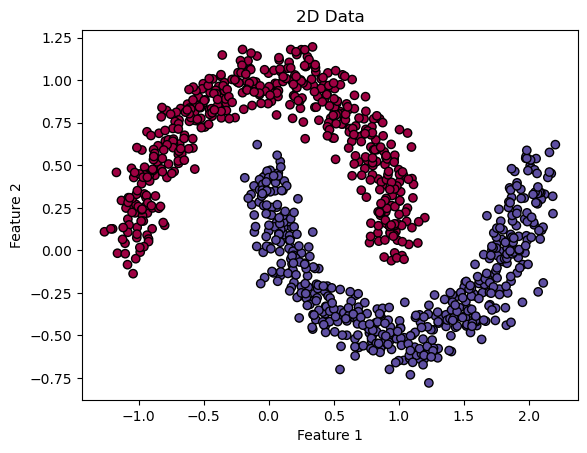

In [32]:
plot_2d_data(X_moon, label)

## Train MLP

Train and evaluate an MLP that is initialized with one input layer, one hidden layer, and one output layer. Use the ReLU function in the hidden layer and the sigmoid function in the output layer.

In [33]:
# Initialize and train MLP
mlp = MLP(num_nodes=2, eta=0.01)
mlp.add_layer(num_nodes=100, activation_function="relu")
mlp.add_layer(num_nodes=1, activation_function="sigmoid")
mlp.train(X_moon, label, max_epoch=1000)

Added layer with 100 nodes.
Added layer with 1 nodes.


## Model Evaluation
The model is evaluated based on accuracy, precision, and recall. A confusion matrix is also generated to provide insights into the model's performance in classifying the two classes.

In [34]:
# Evaluate and plot results
accuracy, precision, recall, conf_matrix = evaluate_model(mlp, X_moon, label)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix: {conf_matrix}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix: (500, 500, 0, 0)


## Visualization of the Results

- **Loss and Accuracy**: The change in loss and accuracy over epochs is plotted, showing the model's learning progress.


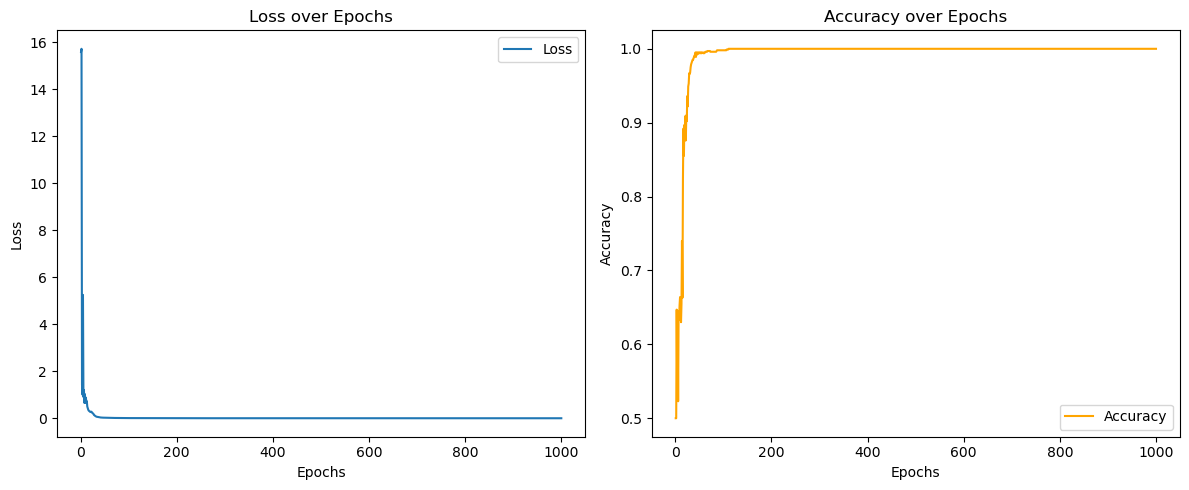

In [35]:
plot_loss_and_accuracy(mlp)

- **Confusion Matrix**: A confusion matrix is displayed to provide a detailed view of the classification accuracy.

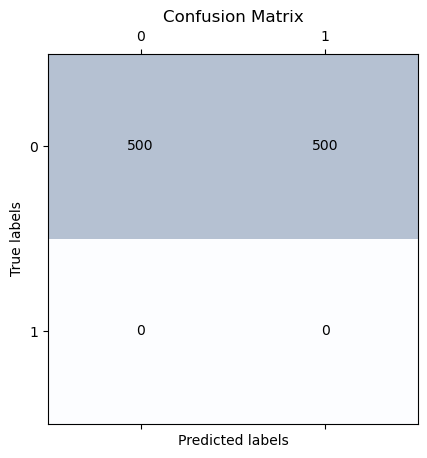

In [36]:
plot_confusion_matrix(np.array(conf_matrix).reshape(2, 2))

- **Decision Boundary**: The decision boundary plotted over the data visualizes how the MLP classifies the two classes.

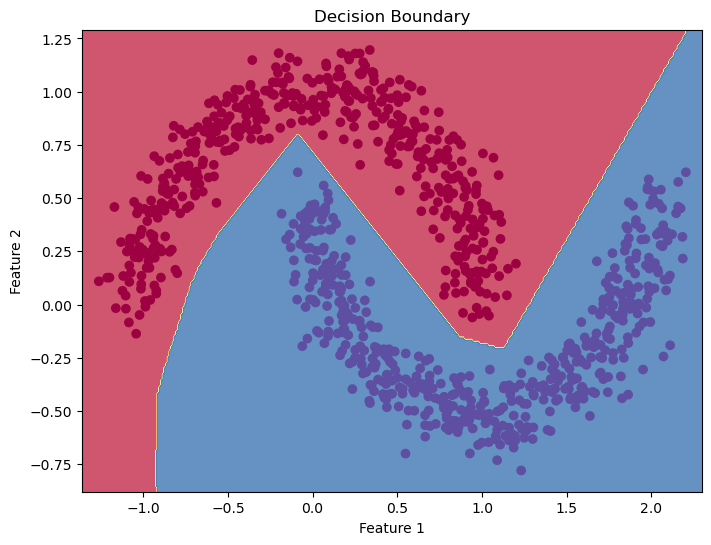

In [37]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(mlp, X_moon, label)